# **Importing Data and Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DAN608/Data/titanic.csv')

# **Viewing Data**

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


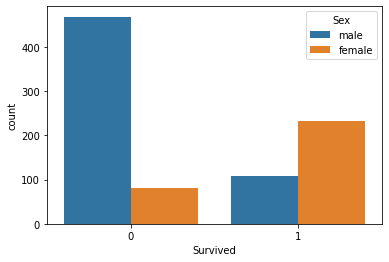

In [7]:
#sns.countplot(df['Survived'], hue=df['Sex'])
sns.countplot('Survived', data=df, hue='Sex')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


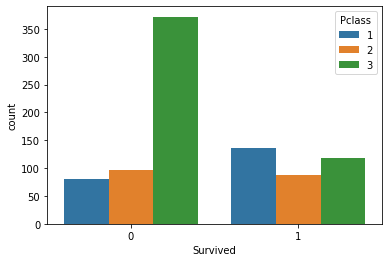

In [8]:
sns.countplot('Survived', data=df, hue='Pclass')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


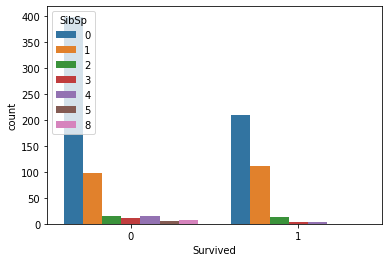

In [9]:
sns.countplot('Survived', data=df, hue='SibSp')

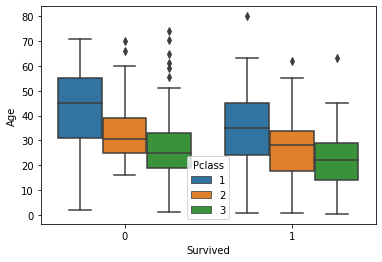

In [10]:
sns.boxplot(x='Survived', y='Age', data=df, hue='Pclass')

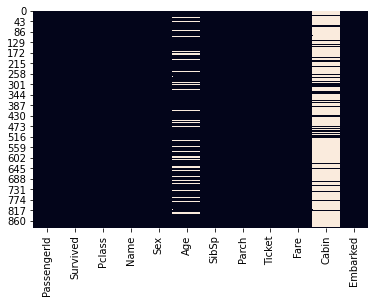

In [11]:
sns.heatmap(df.isnull(), cbar=False)

# **Dealing with missing values**

Calculate the mean age per Pclass

In [12]:
pclass1_mean_age = df[df['Pclass'] == 1]['Age'].mean()
pclass2_mean_age = df[df['Pclass'] == 2]['Age'].mean()
pclass3_mean_age = df[df['Pclass'] == 3]['Age'].mean()
print("Pclass1 mean age is", pclass1_mean_age)
print("Pclass1 mean age is", pclass2_mean_age)
print("Pclass1 mean age is", pclass3_mean_age)

Pclass1 mean age is 38.233440860215055
Pclass1 mean age is 29.87763005780347
Pclass1 mean age is 25.14061971830986


Impute the mean Age per Pclass for the missing age values in the data

In [13]:
def ImputeAge(columns):
  age = columns[0]
  pclass = columns[1]

  if pd.isnull(age):
    if pclass == 1:
      return pclass1_mean_age
    elif pclass == 2:
      return pclass2_mean_age
    elif pclass == 3:
      return pclass3_mean_age
  else:
    return age

In [14]:
df['Age'] = df[['Age', 'Pclass']].apply(ImputeAge, axis=1)

In [15]:
df[['Age', 'Pclass']].head()

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3


In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


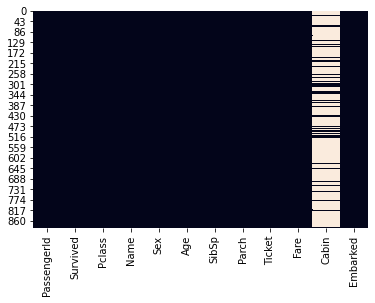

In [17]:
sns.heatmap(df.isnull(), cbar=False)

Drop the Cabin data it has to many missing values

In [18]:
df.drop('Cabin', axis=1, inplace=True)

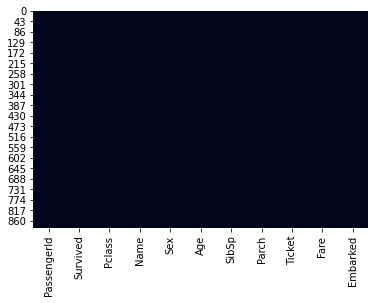

In [19]:
sns.heatmap(df.isnull(), cbar=False)

Drop any remaining missing values

In [20]:
df.dropna(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# **Feature Engineering** 

Create variable that adds 'SibSp' and 'Parch' to create a 'Family_Size' count

In [22]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

Create variable to count ticket frequency to find groups of people traveling together that may not be family members

In [23]:
df['Ticket_Frequency'] = df.groupby('Ticket')['Ticket'].transform('count')

Creating a Title column from the name column and a married column

In [24]:
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df['Married'] = 0
df['Married'].loc[df['Title'] == 'Mrs'] = 1
df['Title'] = df['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs')
df['Title'] = df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Clergy/Doctor/Military')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Creating a numerical column for Title

In [25]:
df['Title_Cat_Num'] = ""

df.loc[df['Title'] == 'Mr', 'Title_Cat_Num'] = 1  
df.loc[df['Title'] == 'Miss/Mrs', 'Title_Cat_Num'] = 2
df.loc[df['Title'] == 'Clergy/Doctor/Military', 'Title_Cat_Num'] = 3
df.loc[df['Title'] == 'Master', 'Title_Cat_Num'] = 4

#for title in df['Title']:
 # if title == 'Mr':
 #   df['Title_Cat_Num'] = 1
 # elif title == 'Miss/Mrs':
 #   df['Title_Cat_Num'] = 2
 # elif title == 'Clergy/Doctor/Military':
 #   df['Title_Cat_Num'] = 3
 # elif title == 'Master':
 #   df['Title_Cat_Num'] = 4

Binning Age so it can be used for logistic regression later

In [26]:
df['Bin_Age'] = pd.cut(df['Age'], bins=[0, 12, 50, 200], labels=['Child','Adult','Elder'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Ticket_Frequency,Title,Married,Title_Cat_Num,Bin_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,Mr,0,1,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,1,Miss/Mrs,1,2,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss/Mrs,0,2,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,2,Miss/Mrs,1,2,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Mr,0,1,Adult


Binning Fare to be used in logistic regression later

In [27]:
df['Bin_Fare'] = pd.qcut(df['Fare'], 13)

Creating dummies values to have binary columns for logistic regression

In [28]:
sex_df = pd.get_dummies(df['Sex'])
pclass_df = pd.get_dummies(df['Pclass'], prefix='Pclass')
age_df = pd.get_dummies(df['Bin_Age'])
title_cat_num_df = pd.get_dummies(df['Title_Cat_Num'], prefix='Title_Cat')
ticket_freq = pd.get_dummies(df['Ticket_Frequency'], prefix='Ticket_Freq')
family_size = pd.get_dummies(df['Family_Size'], prefix='Family_Size')
embarked_df = pd.get_dummies(df['Embarked'], prefix='Port')

In [29]:
df = pd.concat([df, sex_df, pclass_df, age_df, title_cat_num_df, ticket_freq, family_size, embarked_df], axis=1)

**Dropping all non-binary columns so we can do logistic regression analysis on the data**

In [30]:
df.drop(['PassengerId','Name','Ticket', 'Sex', 'Embarked', 'Age', 'Fare', 'Ticket_Frequency', 'Title', 'Title_Cat_Num', 'Bin_Age', 'Bin_Fare', 'SibSp', 'Parch', 'Pclass', 'Family_Size'], axis=1, inplace=True)

In [31]:
df

,Survived,Married,female,male,Pclass_1,Pclass_2,Pclass_3,Child,Adult,Elder,Title_Cat_1,Title_Cat_2,Title_Cat_3,Title_Cat_4,Ticket_Freq_1,Ticket_Freq_2,Ticket_Freq_3,Ticket_Freq_4,Ticket_Freq_5,Ticket_Freq_6,Ticket_Freq_7,Family_Size_1,Family_Size_2,Family_Size_3,Family_Size_4,Family_Size_5,Family_Size_6,Family_Size_7,Family_Size_8,Family_Size_11,Port_C,Port_Q,Port_S
0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
887,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
888,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
889,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


# **Making Training and Testing Data Sets**

In [32]:
y = df['Survived']

In [33]:
X = df[df.columns[1:]]

In [34]:
X.head()

,Married,female,male,Pclass_1,Pclass_2,Pclass_3,Child,Adult,Elder,Title_Cat_1,Title_Cat_2,Title_Cat_3,Title_Cat_4,Ticket_Freq_1,Ticket_Freq_2,Ticket_Freq_3,Ticket_Freq_4,Ticket_Freq_5,Ticket_Freq_6,Ticket_Freq_7,Family_Size_1,Family_Size_2,Family_Size_3,Family_Size_4,Family_Size_5,Family_Size_6,Family_Size_7,Family_Size_8,Family_Size_11,Port_C,Port_Q,Port_S
0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Model Building**

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logreg = LogisticRegression()

In [39]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
predictions = logreg.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
confusion_matrix(y_test, predictions)

array([[141,  26],
       [ 23,  77]])

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       167
           1       0.75      0.77      0.76       100

    accuracy                           0.82       267
   macro avg       0.80      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267

